In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("train.csv", usecols = ["Age", "Fare", "Survived"] )

In [24]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [25]:
df.isnull().mean()*100

Survived     0.000000
Age         20.574163
Fare         0.239234
dtype: float64

In [26]:
X = df.drop(columns=["Survived"])
Y = df["Survived"]

In [27]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [28]:
X_train["Age_imputed"] = X_train["Age"]
X_test["Age_imputed"] = X_test["Age"]

In [29]:
X_test.head()

,Age,Fare,Age_imputed
321,25.0,7.2292,25.0
324,39.0,211.3375,39.0
388,21.0,7.7500,21.0
56,35.0,7.8958,35.0
153,36.0,12.1833,36.0


In [30]:
# Impute missing values in X_train
X_train["Age_imputed"][X_train["Age_imputed"].isnull()] = X_train['Age'].dropna().sample(X_train["Age_imputed"].isnull().sum()).values

# Impute missing values in X_test
X_test["Age_imputed"][X_test["Age_imputed"].isnull()] = X_test['Age'].dropna().sample(X_test["Age_imputed"].isnull().sum()).values


C:\Users\Ketan\AppData\Local\Temp\ipykernel_23952\2315437127.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train["Age_imputed"][X_train["Age_imputed"].isnull()] = X_train['Age'].dropna().sample(X_train["Age_imputed"].isnull().sum()).

In [32]:
X_train

,Age,Fare,Age_imputed
336,32.0,13.0000,32.0
31,24.0,31.5000,24.0
84,NaN,10.7083,30.0
287,24.0,82.2667,24.0
317,19.0,10.5000,19.0
...,...,...,...
71,21.0,7.8958,21.0
106,21.0,7.8208,21.0
270,46.0,75.2417,46.0
348,24.0,13.5000,24.0


C:\Users\Ketan\AppData\Local\Temp\ipykernel_23952\2821317055.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Age"], label = "Original", hist= False)
C:\Users\Ketan\AppData\Local\Temp\ipykernel_23952\2821317055.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_t

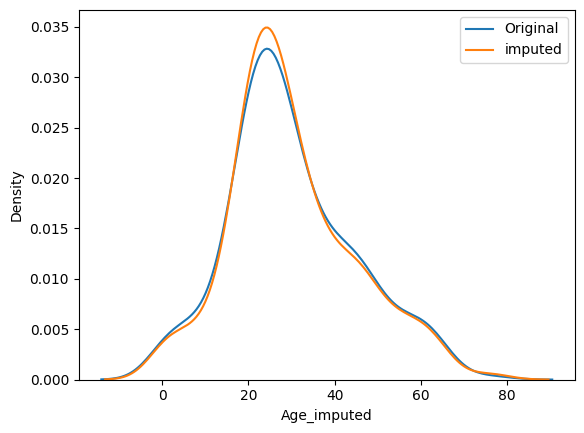

In [41]:
sns.distplot(X_train["Age"], label = "Original", hist= False)
sns.distplot(X_train["Age_imputed"], label = "imputed", hist= False)
plt.legend()
plt.show()

In [42]:
print("original variable varience: ",X_train["Age"].var())
print("Varience after random imputation",X_train["Age_imputed"].var())

original variable varience:  214.79174558363312
Varience after random imputation 208.96468618079157


In [44]:
X_train[["Fare","Age","Age_imputed"]].cov()

,Fare,Age,Age_imputed
Fare,3370.347022,324.009543,253.950920
Age,324.009543,214.791746,214.791746
Age_imputed,253.950920,214.791746,208.964686


<Axes: >

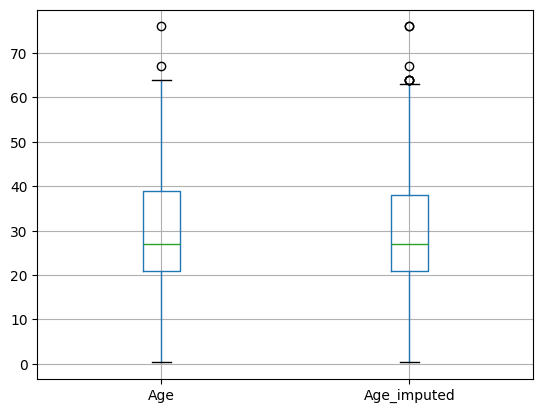

In [47]:
X_train[["Age","Age_imputed"]].boxplot()

Categorical data

In [67]:
# Specify the path to the CSV file
data_path = "house_price_dataset/train.csv"
columns_to_use = ['GarageQual', 'FireplaceQu', 'SalePrice']

# Read the CSV file into a DataFrame
data = pd.read_csv(data_path,usecols=columns_to_use)

In [68]:
print(data.head())

  FireplaceQu GarageQual  SalePrice
0         NaN         TA     208500
1          TA         TA     181500
2          TA         TA     223500
3          Gd         TA     140000
4          TA         TA     250000


In [69]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [80]:
X = data
Y = data["SalePrice"]

In [81]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [82]:
X_train["GarageQual_imputed"] = X_train["GarageQual"]
X_test["GarageQual_imputed"] = X_test["GarageQual"]

X_train["FireplaceQu_imputed"] = X_train["FireplaceQu"]
X_test["FireplaceQu_imputed"] = X_test["FireplaceQu"]


In [83]:
print(X_train.columns.tolist())


['FireplaceQu', 'GarageQual', 'SalePrice', 'GarageQual_imputed', 'FireplaceQu_imputed']


In [ ]:
# Impute missing values in X_train
X_train["GarageQual_imputed"][X_train["GarageQual_imputed"].isnull()] = X_train['GarageQual'].dropna().sample(X_train["GarageQual"].isnull().sum()).values

# Impute missing values in X_test
X_test["GarageQual_imputed"][X_test["GarageQual_imputed"].isnull()] = X_test['GarageQual'].dropna().sample(X_test["GarageQual"].isnull().sum()).values


# Impute missing values in X_train
X_train["FireplaceQu_imputed"][X_train["FireplaceQu_imputed"].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train["FireplaceQu"].isnull().sum()).values

# Impute missing values in X_test
X_test["FireplaceQu_imputed"][X_test["FireplaceQu_imputed"].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test["FireplaceQu"].isnull().sum()).values




In [87]:
temp = pd.concat(
    [
        X_train["FireplaceQu"].value_counts() / len(X_train["FireplaceQu"].dropna()),
        X_train["FireplaceQu_imputed"].value_counts() / len(X_train)
        
    ],
    axis = 1
)
temp.columns = ["Original", "imputed"]


In [88]:
temp

,Original,imputed
Gd,0.494272,0.494007
TA,0.412439,0.415240
Fa,0.040917,0.039384
Po,0.027823,0.027397
Ex,0.024550,0.023973


In [89]:
temp = pd.concat(
    [
        X_train["GarageQual"].value_counts() / len(X_train["GarageQual"].dropna()),
        X_train["GarageQual_imputed"].value_counts() / len(X_train)
        
    ],
    axis = 1
)
temp.columns = ["Original", "imputed"]

In [90]:
temp

,Original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.036815
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856
